In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
video_path = r"C:\Users\PRERNA\Downloads\mixkit-one-on-one-in-a-soccer-game-43483-hd-ready.mp4" 
cap = cv2.VideoCapture(video_path)
output_path = 'annotated_output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))


In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if prev_frame is None:
        prev_frame = gray_frame
        continue

    # Difference Calculation :- Computing the absolute difference between the current frame and the previous frame
    frame_diff = cv2.absdiff(prev_frame, gray_frame)

    # Thresholding :- Applying thresholding to get a binary image
    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

    # Morphological operations to reduce noise
    kernel = np.ones((5, 5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Detecting motion by counting non-zero pixels
    motion_intensity = cv2.countNonZero(thresh)

    # Recording motion events based on a threshold
    if motion_intensity > 500:  # You can adjust this threshold
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC)  # Store the timestamp of the event
        motion_events.append(timestamp)  # Add to motion events list

        # Draw contours around moving areas
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            if cv2.contourArea(contour) > 500:  # Filter small contours
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Store annotated frame along with timestamp
        annotated_frames.append((frame.copy(), timestamp))

    # Updating the previous frame
    prev_frame = gray_frame

    # Write the annotated frame to the output video
    out.write(frame)

# Release the video capture and video write objects
cap.release()
out.release()
cv2.destroyAllWindows()


Motion detection results:
Motion detected at: 41.71 ms
Motion detected at: 83.42 ms
Motion detected at: 125.12 ms
Motion detected at: 166.83 ms
Motion detected at: 208.54 ms
Motion detected at: 250.25 ms
Motion detected at: 291.96 ms
Motion detected at: 333.67 ms
Motion detected at: 375.38 ms
Motion detected at: 417.08 ms
Motion detected at: 458.79 ms
Motion detected at: 500.50 ms
Motion detected at: 542.21 ms
Motion detected at: 583.92 ms
Motion detected at: 625.62 ms
Motion detected at: 667.33 ms
Motion detected at: 709.04 ms
Motion detected at: 750.75 ms
Motion detected at: 792.46 ms
Motion detected at: 834.17 ms
Motion detected at: 875.88 ms
Motion detected at: 917.58 ms
Motion detected at: 959.29 ms
Motion detected at: 1001.00 ms
Motion detected at: 1042.71 ms
Motion detected at: 1084.42 ms
Motion detected at: 1126.12 ms
Motion detected at: 1167.83 ms
Motion detected at: 1209.54 ms
Motion detected at: 1251.25 ms
Motion detected at: 1292.96 ms
Motion detected at: 1334.67 ms
Motion 

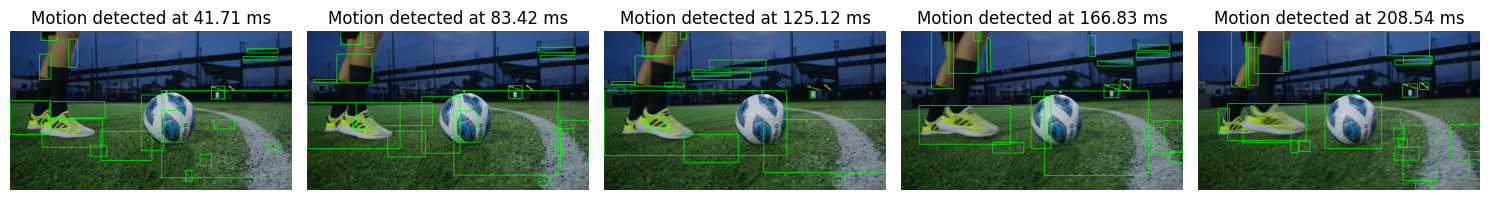

Annotated video saved at annotated_output_video.mp4


In [4]:
# Initialize variables
prev_frame = None
motion_events = []
annotated_frames = []  # To store frames with motion


# Print timestamps of motion events
print("Motion detection results:")
for timestamp in motion_events:
    print(f'Motion detected at: {timestamp:.2f} ms')

# Display annotated frames using Matplotlib
num_frames_to_display = min(5, len(annotated_frames))  # Change this to display more or fewer frames

plt.figure(figsize=(15, 5))
for i in range(num_frames_to_display):
    frame, timestamp = annotated_frames[i]
    plt.subplot(1, num_frames_to_display, i + 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title(f'Motion detected at {timestamp:.2f} ms')
    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

print(f"Annotated video saved at {output_path}")
